In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#@title
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.5341 - acc: 0.7895 - val_loss: 0.4083 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.3272 - acc: 0.8983 - val_loss: 0.3160 - val_acc: 0.8842
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2365 - acc: 0.9240 - val_loss: 0.2831 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1874 - acc: 0.9391 - val_loss: 0.2867 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1509 - acc: 0.9519 - val_loss: 0.2767 - val_acc: 0.8887
Epoch 6/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1263 - acc: 0.9614 - val_loss: 0.3123 - val_acc: 0.8797
Epoch 7/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1052 - acc: 0.9683 - val_loss: 0.3115 - 

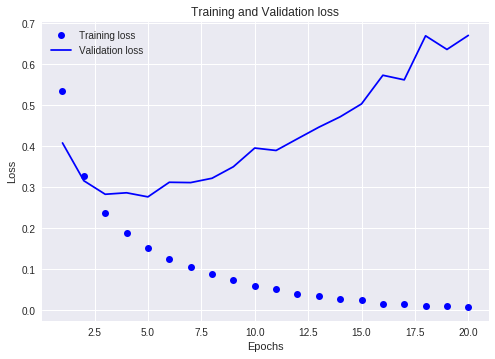

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc'])+1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

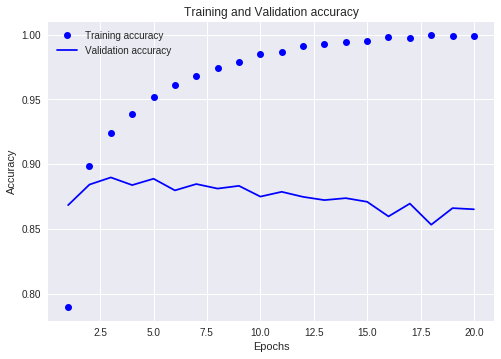

In [0]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [0]:
results = model.evaluate(x_test, y_test)
print(results)

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 2s 83us/step
[0.7370678890943527, 0.84996]
Epoch 1/4
25000/25000 [==============================] - 3s 120us/step - loss: 0.2371 - acc: 0.9454
Epoch 2/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1424 - acc: 0.9592
Epoch 3/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.1136 - acc: 0.9670
Epoch 4/4
25000/25000 [==============================] - 2s 84us/step
[0.5023260688352584, 0.85268]
